In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math
import sys
import copy

In [2]:
def read_single_window_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200, k=5000):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [3]:
def read_single_window_gt_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200,k=5000):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_gt_summation")
                
                for file in sorted(os.listdir(dynamic_full_path)):  
                    fsd_file = os.path.join(dynamic_full_path, file)
                    fsd = {}
                    with open(fsd_file, 'r') as f:
                        for line in f:
                            if int(line.strip().split()[0]) == 0:
                                continue
                            fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                            
                    res.append(fsd)
            
    return res

# read_fsd_data()

In [4]:
## parameters

caida = ["caida-500w", "caida-250w", "caida-125w", "caida-50w"]
zipf2 = ["zipf2-250w", "zipf2-125w", "zipf2-50w"]
zipf1 = ["zipf1-250w", "zipf1-125w", "zipf1-50w"]


lens = [
        # ["5", "5"],
        ["6", "4"],
        # ["7", "3"],
        # ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
pcap_file.append("caida-500w_10_.pcap")
pcap_file.append("caida-250w_10_.pcap")
pcap_file.append("caida-125w_10_.pcap")
pcap_file.append("caida-50w_10_.pcap")
pcap_file.append("zipf2-250w_10_.pcap") 
pcap_file.append("zipf2-125w_10_.pcap") 
pcap_file.append("zipf2-50w_10_.pcap") 
pcap_file.append("zipf1-250w_10_.pcap") 
pcap_file.append("zipf1-125w_10_.pcap") 
pcap_file.append("zipf1-50w_10_.pcap") 

### caida + zipf2 [10:22]
for a in caida:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + caida [22:34]
for a in zipf2:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + zipf1 [34:46]
for a in caida:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + caida [46:58]
for a in zipf1:
    for b in caida:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf1 [58:67]
for a in zipf2:
    for b in zipf1:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf2 [67:76]
for a in zipf1:
    for b in zipf2:
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### caida + caida [76:88]
for a in caida:
    for b in caida:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf2 + zipf2 [88:94]
for a in zipf2:
    for b in zipf2:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
### zipf1 + zipf1 [94:100]
for a in zipf1:
    for b in zipf1:
        if a == b:
            continue
        for l in lens:
            pcap_file.append(f'{a}_{l[0]}_{b}_{l[1]}.pcap')
            
print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida-500w_10_.pcap', 'caida-250w_10_.pcap', 'caida-125w_10_.pcap', 'caida-50w_10_.pcap', 'zipf2-250w_10_.pcap', 'zipf2-125w_10_.pcap', 'zipf2-50w_10_.pcap', 'zipf1-250w_10_.pcap', 'zipf1-125w_10_.pcap', 'zipf1-50w_10_.pcap', 'caida-500w_6_zipf2-250w_4.pcap', 'caida-500w_6_zipf2-125w_4.pcap', 'caida-500w_6_zipf2-50w_4.pcap', 'caida-250w_6_zipf2-250w_4.pcap', 'caida-250w_6_zipf2-125w_4.pcap', 'caida-250w_6_zipf2-50w_4.pcap', 'caida-125w_6_zipf2-250w_4.pcap', 'caida-125w_6_zipf2-125w_4.pcap', 'caida-125w_6_zipf2-50w_4.pcap', 'caida-50w_6_zipf2-250w_4.pcap', 'caida-50w_6_zipf2-125w_4.pcap', 'caida-50w_6_zipf2-50w_4.pcap', 'zipf2-250w_6_caida-500w_4.pcap', 'zipf2-250w_6_caida-250w_4.pcap', 'zipf2-250w_6_caida-125w_4.pcap', 'zipf2-250w_6_caida-50w_4.pcap', 'zipf2-125w_6_caida-500w_4.pcap', 'zipf2-125w_6_caida-250w_4.pcap', 'zipf2-125w_6_caida-125w_4.pcap', 'zipf2-125w_6_caida-50w_4.pcap', 'zipf2-50w_6_caida-500w_4.pcap', 'zipf2-50w_6_caida-250w_4.pcap', 'zipf2-50w_6_caida-125w_4.pcap', 'z

In [44]:
def plot_confusion_matrix(cm, type, mem):
    
    acc = round((cm[0][0] + cm[1][1])*100 / (sum(cm[0])+sum(cm[1])), 1)
    pre = round((cm[0][0])* 100 / (sum(cm[0]) ), 1)
    recall = round((cm[0][0])* 100 / (cm[0][0] + cm[1][0]), 1)
    f1score = round(2*(pre*recall) / (pre + recall), 1)
    tnr = round((cm[1][1])* 100 / (cm[0][1] + cm[1][1]), 1)
    
    print(f'Accuracy  = {acc} %')
    print(f'Precision = {pre} %')
    print(f'Recall    = {recall} %')
    print(f'F1Score   = {f1score} %')
    # print(f'TNR    = {tnr} %')
    
    # Class labels
    classes1 = [f'True\n({type} changed)', f'False\n({type} no-changed)']
    classes2 = ['Positive\n(detect)', 'Negative\n(no-detect)']

    # Create the plot
    fig, ax = plt.subplots(figsize=(7,7))
    cax = ax.matshow(cm, cmap='Blues', interpolation='nearest')

    # Add colorbar
    plt.colorbar(cax, shrink=0.8)

    # Set axis labels
    ax.set_xticklabels([''] + classes1, fontsize=16)
    ax.set_yticklabels([''] + classes2, fontsize=16)

    # Add annotations
    for (i, j), val in np.ndenumerate(cm):
        if (i, j) == (0, 0):
            plt.text(j, i, f'{val}\n(TP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (0, 1):
            plt.text(j, i, f'{val}\n(FP)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 0):
            plt.text(j, i, f'{val}\n(FN)', ha='center', va='center', color='black', fontsize=30)
        elif (i, j) == (1, 1):
            plt.text(j, i, f'{val}\n(TN)', ha='center', va='center', color='black', fontsize=30)

    # Customize gridlines and layout
    ax.set_xticks(np.arange(-0.5, len(classes1), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(classes2), 1), minor=True)
    ax.tick_params(which='minor', bottom=False, left=False)

    # Add title
    plt.title(f'Confusion Matrix (Memory = {mem})', fontsize=20)

    plt.show()

### Predict FSD Changes

In [5]:
def changes_occured(sec_var, n, ws=20):
    
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window           
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (2+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (4 + sec_var.index(val) - 1)/5
        
    sec_var_hit = 0
    
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return sec_var_hit, time_sec_var, val, max_time
    
    

In [6]:
def calculate_mrd(fsd1, fsd2):
    MRD_nom = 0
    MRD_denom = 0
    for i in range(1, max(fsd1.keys())+1):
        if i in fsd1.keys():
            true = fsd1[i]
        else:
            true = 0
            
        if i in fsd2.keys():
            est = fsd2[i]
        else:
            est = 0
            
        MRD_nom += abs(true - est)
        MRD_denom += float(true + est)/2
    MRD = MRD_nom/MRD_denom
    
    return MRD

In [7]:
def normalize_fsd(fsd):
    fn = sum(list(fsd.values()))
    
    return {key: (val/fn) for key,val in fsd.items()}
            
    # calcualte CDF
    cdf = {}
    culmulative_prob = 0.0
    for fs, freq in sorted(fsd.items()):
        culmulative_prob += (freq/fn)
        cdf[fs] = culmulative_prob
        
    # get bins
    bin = {}
    idx = 0
    for fs, prob in sorted(cdf.items()):
        while idx < round(prob * 100):
            bin[idx] = fs
            idx += 1
            
    qfsd = {}
    idx = 0
    for fs, freq in sorted(fsd.items()):
        while fs > bin[idx]:
            if idx < len(bin) - 1:
                idx += 1
            else:
                break
            
        if bin[idx] in qfsd.keys():
            qfsd[bin[idx]] += freq/fn
        else:
            qfsd[bin[idx]] = freq/fn
             
    return qfsd

In [8]:
def plot_mrd_variation(mrd_var, name, window_size=200, typ='Var'):
    
    res = []
    
    res.append(mrd_var)
    
    print(name)
    print(mrd_var)

    plt.figure(figsize=(12, 4))
        
    for i in range(len(res)):
        plt.plot(res[i], label=f'MRD {typ}')

    # Add labels and legend
    plt.xlabel('Time (sec)')
    if typ == "MRD":
        plt.ylabel('MRD')
    else:
        plt.ylabel('Value')
    plt.title('%s MRD Variation' % (name))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks, size=14)
    plt.yticks(size=14)
    plt.legend(ncol=1, fontsize=16)

    # Show the plot
    plt.show()
    

In [47]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20,k=5000):
    
    # top 100
    res_fsd = {}
    res_mrd = {}
    res_mrd_var = {}
    res_mrd_sec_var = {}
    # res_sec_var = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_mrd[name] = [None, None] # 0, 1
            res_mrd_var[name] = [None, None, None] # 0, 1, 2
            res_mrd_sec_var[name] = [None, None, None, None] # 0, 1, 2, 3
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size,k)
            # fsd_total = read_single_window_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total[:-1] # ignore last window (less than 200ms)
            
            for i in range(1, len(res_fsd[name])):
                # res_mrd[name].append(calculate_mrd(res_fsd[name][i-1], res_fsd[name][i]))
                res_mrd[name].append(calculate_mrd(normalize_fsd(res_fsd[name][i-1]), normalize_fsd(res_fsd[name][i])))
                # print(normalize_fsd(res_fsd[name][i-1]))
                # print(normalize_fsd(res_fsd[name][i]))
                
            # print(len(res_fsd[name]), len(res_mrd[name]), res_mrd[name])
                
            # plot_mrd_variation(res_mrd[name], d[:-5], window_size, 'MRD')
                
            for i in range(3, len(res_mrd[name])):
                res_mrd_var[name].append(abs(res_mrd[name][i] - res_mrd[name][i-1]))
                
            # plot_mrd_variation(res_mrd_var[name], d[:-5], window_size, 'Var')
                
            for i in range(4, len(res_mrd_var[name])):
                res_mrd_sec_var[name].append(abs(res_mrd_var[name][i] - res_mrd_var[name][i-1]))
                
            # plot_mrd_variation(res_mrd_sec_var[name], d[:-5], window_size, 'Sec Var')
            # print(len(res_mrd_var[name]), len(res_mrd_sec_var[name]))

    # # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    
    pred = []
    
    norm_hit = 0
    iqr_hit = 0
    
    hit = []

    
    for i in range(len(label)):
        
        # sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd_sec_var[label[i]][4:], dev, ws)
        sec_var_hit, time_sec_var, val, max_time = changes_occured(res_mrd[label[i]][2:], dev, ws)
        
        pred.append(time_sec_var)
           
        # print(i)
        # print(label[i])
        # print('\tFSD MRD ')
        # print('\t\t', res_mrd[label[i]])
        # print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        # print(f'\t\t{val}, max time: {max_time}')
        # print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit.append(1)
            else:
                hit.append(0)
        else:
            if sec_var_hit == 1:
                hit.append(1)
            else:
                hit.append(0)
                

    succ = 0

    for i in range(len(label)):
        if hit[i] == 1:
            if answer[i] == 10:
                succ += 1
            else:
                if abs(pred[i] - answer[i]) <= 1.0:
                    succ += 1
    
    print("No detect")
    detection = [[0,0],[0,0]]
    for i in range(len(label)):
        if label[i].split("_")[1] == "10" or label[i].split("_")[0].split("-")[0] == label[i].split("_")[2].split("-")[0]: # same dist
            if hit[i] == 1:
                if answer[i] == 10:
                    detection[1][1] += 1
                    print(label[i])
                else:
                    if abs(pred[i] - answer[i]) <= 1.0:
                        detection[0][1] += 1
                    else:
                        detection[1][1] += 1
                        print(label[i])
            else:
                detection[1][1] += 1
                print(label[i])
        else: # diff dist
            if hit[i] == 1:
                if abs(pred[i] - answer[i]) <= 1.0:
                    detection[0][0] += 1
                else:
                    detection[1][0] += 1
                    print(label[i])
            else:
                detection[1][0] += 1 
                print(label[i])
    print()
    
    # print("single comprehensive predict")
    # print(f'total flow predict: {succ}/{len(pred)} {succ*100/len(pred)}%')
    # print()
    
    print("confusion matrix")
    print(f'config    changed, detecting: {detection[0][0]}')
    print(f'config    changed, no-detect: {detection[1][0]}')
    print(f'config no-changed, detecting: {detection[0][1]}')
    print(f'config no-changed, no-detect: {detection[1][1]}')
    print(detection[0])
    print(detection[1])
    print()
    
    plot_confusion_matrix(detection, type="DIST", mem=f"{int(width[0]*4*4/1024)}KB")
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

No detect
caida-500w_10__4096
caida-250w_10__4096
caida-125w_10__4096
caida-50w_10__4096
zipf2-250w_10__4096
zipf2-125w_10__4096
zipf2-50w_10__4096
zipf1-250w_10__4096
zipf1-125w_10__4096
zipf1-50w_10__4096
caida-50w_6_zipf2-50w_4_4096
zipf1-250w_6_zipf1-125w_4_4096
zipf1-125w_6_zipf1-250w_4_4096
zipf1-125w_6_zipf1-50w_4_4096
zipf1-50w_6_zipf1-125w_4_4096

confusion matrix
config    changed, detecting: 65
config    changed, no-detect: 1
config no-changed, detecting: 20
config no-changed, no-detect: 14
[65, 20]
[1, 14]

Accuracy  = 79.0 %
Precision = 76.5 %
Recall    = 98.5 %
F1Score   = 86.1 %


/tmp/ipykernel_30628/2177958477.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes1, fontsize=16)
/tmp/ipykernel_30628/2177958477.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes2, fontsize=16)


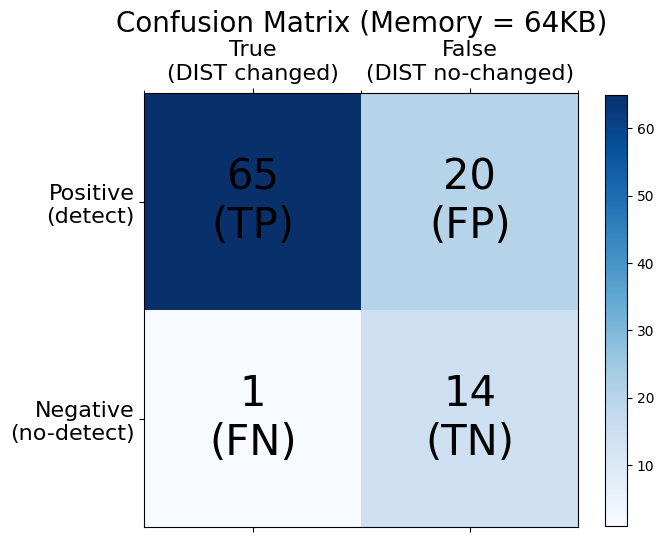

Accuracy  = 53.0 %
Precision = 44.7 %
Recall    = 100.0 %
F1Score   = 61.8 %


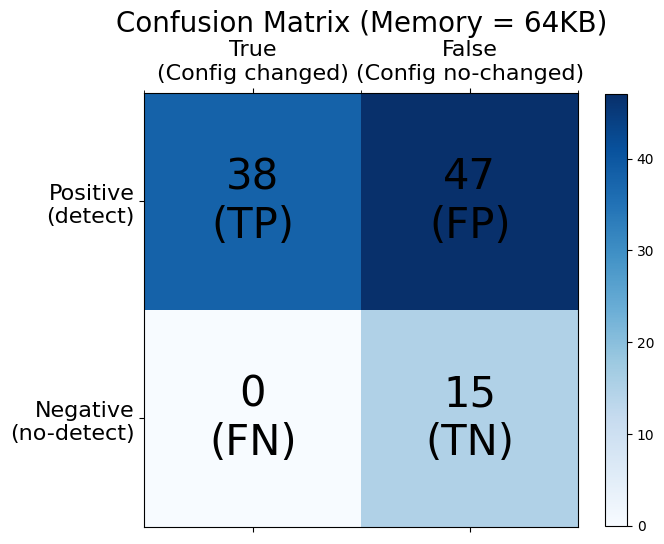

In [53]:
# predict(width=widths, datasets=pcap_file[:10],    window_size=200, dev=3, ws=25, k=1000)

# predict(width=widths, datasets=pcap_file[76:88],  window_size=200, dev=3, ws=25, k=1000)
# predict(width=widths, datasets=pcap_file[88:94],  window_size=200, dev=3, ws=25, k=1000)
# predict(width=widths, datasets=pcap_file[94:100], window_size=200, dev=3, ws=25, k=1000)

# predict(width=widths, datasets=pcap_file[10:22],  window_size=200, dev=3, ws=25, k=1000)
# predict(width=widths, datasets=pcap_file[22:34],  window_size=200, dev=3, ws=25, k=1000)
# predict(width=widths, datasets=pcap_file[34:46],  window_size=200, dev=3, ws=25, k=1000)
# predict(width=widths, datasets=pcap_file[46:58],  window_size=200, dev=3, ws=25, k=1000)
# predict(width=widths, datasets=pcap_file[58:67],  window_size=200, dev=3, ws=25, k=1000)
# predict(width=widths, datasets=pcap_file[67:76],  window_size=200, dev=3, ws=25, k=1000)


# predict(width=[2048], datasets=pcap_file,  window_size=200, dev=3, ws=25, k=5000)
# plot_confusion_matrix([[38,49],[0,13]], type="Config", mem=f"{int(2048*4*4/1024)}KB")

predict(width=[4096], datasets=pcap_file,  window_size=200, dev=3, ws=25, k=5000)
plot_confusion_matrix([[38,47],[0,15]], type="Config", mem=f"{int(4096*4*4/1024)}KB")

# predict(width=[8192], datasets=pcap_file,  window_size=200, dev=3, ws=25, k=5000)
# plot_confusion_matrix([[37,48],[1,14]], type="Config", mem=f"{int(8192*4*4/1024)}KB")


### Predict Current FSD

In [59]:
def prepare_profiler_dirty_fsd_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida0517-125w_10_.pcap', window_size=200, k=5000):
    
    profiler_fsd = {}
    profiler_folder_path = "/home/ming/SketchMercator/pattern_detection/traffic_generator/pcap_file_new/"
    for file_name in sorted(os.listdir(profiler_folder_path)):
        profiler_fsd[file_name[:-9]] = []
    
    # res = {}
    for epoch in epochs:
        for pf in profiler_fsd.keys():
            path = f"../SketchPatternQueryOffline/{algo}/{pf}_10_.pcap/"\
                    f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
            
            for dir in sorted(os.listdir(path)):
                p = os.path.join(path, dir)
                if os.path.isdir(p): 
                    window_dir = "window_" + str(window_size)
                    dynamic_full_path = os.path.join(path, dir, window_dir, f"top{k}/single_window_randk_summation")
                    
                    for file in sorted(os.listdir(dynamic_full_path)):  
                        fsd_file = os.path.join(dynamic_full_path, file)
                        fsd = {}
                        with open(fsd_file, 'r') as f:
                            for line in f:
                                if int(line.strip().split()[0]) == 0:
                                    continue
                                fsd[int(line.strip().split()[0])] = int(line.strip().split()[1])
                                
                        profiler_fsd[pf].append(fsd)
                
    return profiler_fsd

# read_fsd_data()

In [55]:
def get_avg_fsd(fsd_list):
    avg_fsd = {}
    
    all_keys = set().union(*[d.keys() for d in fsd_list])
    for key in all_keys:
        avg_fsd[key] = 0
        
    for fsd in fsd_list:
        for key, val in fsd.items():
            avg_fsd[key] += val
            
    avg_fsd = {key: int(val/len(fsd_list)) for key, val in avg_fsd.items()}
    sorted_fsd = dict(sorted(list(avg_fsd.items())))
    
    return sorted_fsd


In [56]:
def find_dist_by_dirty_fsd(profiler_fsd, unknown_fsd):
    
    all_mrd = {}
    min_mrd = sys.float_info.max
    predict_dist = ""
    for name, dist in profiler_fsd.items():
        # mrd = calculate_mrd(dist, unknown_fsd)
        mrd = calculate_mrd(normalize_fsd(dist), normalize_fsd(unknown_fsd))
        all_mrd[name] = mrd
        if mrd < min_mrd:
            min_mrd = mrd
            predict_dist = name
    
    mrds = []
    for name, mrd in all_mrd.items():
        mrds.append(mrd)
        
    # for name, dist in profiler_fsd.items():
    #     # mrd = calculate_mrd(dist, unknown_fsd)
    #     mrd = calculate_mrd(normalize_fsd(dist), normalize_fsd(unknown_fsd))
        
    #     dist = name.split("-")[0]
    #     if dist not in all_mrd.keys():
    #         all_mrd[dist] = []
    #     all_mrd[dist].append(mrd)
    
    # mrds = []
    # for name, mrds in all_mrd.items():
    #     mrd = sum(mrds) / len(mrds)
    #     mrds.append(mrd)
        
    #     if mrd < min_mrd:
    #         min_mrd = mrd
    #         predict_dist = name
        
        
    return predict_dist, mrds
    

In [87]:
def predict_dist_by_dirty_fsd(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20, start=0, predict_time = 3, k=5000):
    
    # top 10000
    res_fsd = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size, k)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
    
    # find dist
    success = 0
    profiler_fsd = prepare_profiler_dirty_fsd_data(k=k)
    # prepare profiler avg dirty fsd
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    for i in range(len(label)):
        pcap_file_name = label[i][:-5] + ".pcap"
        # print(len(sampled_flowkey))
        print("now finding ", pcap_file_name, "'s distribution")
        vote = {}
        all_mrds = []
        
        ### avg
        # selected_fsd = res_fsd[label[i]][start:min(start+int(predict_time * 1000 / window_size), len(res_fsd[label[i]]))]
        # avg_selected_fsd = get_avg_fsd(selected_fsd)
        # dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd, avg_selected_fsd)
        # vote[dist_name] = 1
        
        ### vote
        for j in range(min(int(predict_time * 1000 / window_size), len(res_fsd[label[i]])-start)):
            # print(start + j)
            dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd, res_fsd[label[i]][start+j])
            all_mrds.append(mrds)
            # break
            # print(dist_name)
            if dist_name in vote:
                vote[dist_name] += 1
            else:
                vote[dist_name] = 1
        
        if start < 25:
            if pcap_file_name.split("-")[0] == max(vote, key=vote.get).split("-")[0]:
                    success += 1
        else:
            if pcap_file_name.split("-")[1].split("_")[-1] == max(vote, key=vote.get).split("-")[0]:
                    success += 1
        
        # if start == 0 or start == 5:
        #     if pcap_file_name.split("-")[0] == max(vote, key=vote.get):
        #         success += 1
        # else:
        #     if pcap_file_name.split("_")[2].split("-")[0] == max(vote, key=vote.get):
        #         success += 1
        
        print("==> ", max(vote, key=vote.get), vote)
        # plot_mrd(pcap_file_name[:-5], all_mrds, window_size, predict_time, pcap_file_name.split("_")[0])
        print("---\n")
        
    
    print(f"predict : {success}/{len(label)} , ({success*100/len(label)} %)")
 

In [81]:
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[:10],    window_size=200, dev=3, ws=25, start=0, predict_time = 0.6, k=5000)

# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[76:88],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[88:94],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[94:100], window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)

# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[10:22],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[22:34],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[34:46],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[46:58],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[58:67],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[67:76],  window_size=200, dev=3, ws=25,start=30, predict_time = 0.6, k=5000)

predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[:10],    window_size=200, dev=3, ws=25, start=0, predict_time = 2, k=5000)
predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[10:22],    window_size=200, dev=3, ws=25, start=30, predict_time = 2, k=5000)
# predict_dist_by_dirty_fsd(width=widths, datasets=pcap_file[10:100],    window_size=200, dev=3, ws=25, start=30, predict_time = 2, k=5000)

now finding  caida-500w_10_.pcap 's distribution
==>  caida-500w {'caida-500w': 10}
---

now finding  caida-250w_10_.pcap 's distribution
==>  caida-250w {'caida-250w': 10}
---

now finding  caida-125w_10_.pcap 's distribution
==>  caida-125w {'caida-125w': 10}
---

now finding  caida-50w_10_.pcap 's distribution
==>  caida-50w {'caida-50w': 9, 'caida-125w': 1}
---

now finding  zipf2-250w_10_.pcap 's distribution
==>  zipf2-250w {'caida-500w': 1, 'caida-250w': 1, 'zipf2-250w': 8}
---

now finding  zipf2-125w_10_.pcap 's distribution
==>  zipf2-125w {'zipf2-250w': 2, 'zipf2-125w': 8}
---

now finding  zipf2-50w_10_.pcap 's distribution
==>  zipf2-50w {'zipf2-50w': 9, 'zipf2-125w': 1}
---

now finding  zipf1-250w_10_.pcap 's distribution
==>  zipf1-250w {'zipf1-250w': 10}
---

now finding  zipf1-125w_10_.pcap 's distribution
==>  zipf1-250w {'zipf1-250w': 9, 'zipf1-125w': 1}
---

now finding  zipf1-50w_10_.pcap 's distribution
==>  zipf1-50w {'zipf1-125w': 3, 'zipf1-250w': 3, 'zipf1-50w

---

In [90]:
def predict_dist(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['caida0517-125w_10_.pcap'], window_size=200, dev=3, ws=20, start=0, predict_time = 3, k=5000):
    
    # top 10000
    res_fsd = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            
            # fsd_total = read_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)
            fsd_total = read_single_window_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size, k)
            # fsd_total = read_gt_fsd_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_fsd[name] = fsd_total
            
    
    # find dist
    success = 0
    profiler_fsd = prepare_profiler_dirty_fsd_data(k=k)
    # prepare profiler avg dirty fsd
    profiler_avg_fsd = {}
    for name, fsd_list in profiler_fsd.items():
        profiler_avg_fsd[name] = get_avg_fsd(fsd_list)
        
    for i in range(len(label)):
        pcap_file_name = label[i][:-5] + ".pcap"
        vote = {}
        all_mrds = []
        
        # ### avg
        # selected_fsd = res_fsd[label[i]][start:min(start+int(predict_time * 1000 / window_size), len(res_fsd[label[i]]))]
        # avg_selected_fsd = get_avg_fsd(selected_fsd)
        # dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd, avg_selected_fsd)
        # vote[dist_name] = 1
        
        ### vote
        for j in range(min(int(predict_time * 1000 / window_size), len(res_fsd[label[i]])-start)):
            # print(start + j)
            dist_name, mrds = find_dist_by_dirty_fsd(profiler_avg_fsd, res_fsd[label[i]][start+j])
            all_mrds.append(mrds)
            # break
            # print(dist_name)
            if dist_name in vote:
                vote[dist_name] += 1
            else:
                vote[dist_name] = 1
        
        if start < 25:
            if pcap_file_name.split("-")[0] == max(vote, key=vote.get).split("-")[0]:
                    success += 1
        else:
            if pcap_file_name.split("-")[1].split("_")[-1] == max(vote, key=vote.get).split("-")[0]:
                    success += 1
        
    return success
 

{-1.0: [26.67, 28.89, 46.67, 51.11], -0.4: [46.67, 56.67, 65.56, 70.0], -0.2: [45.56, 67.78, 71.11, 74.44], 0: [67.78, 75.56, 73.33, 76.67], 0.2: [75.56, 75.56, 77.78, 77.78], 0.4: [77.78, 78.89, 77.78, 76.67], 1.0: [78.89, 76.67, 77.78, 77.78]}


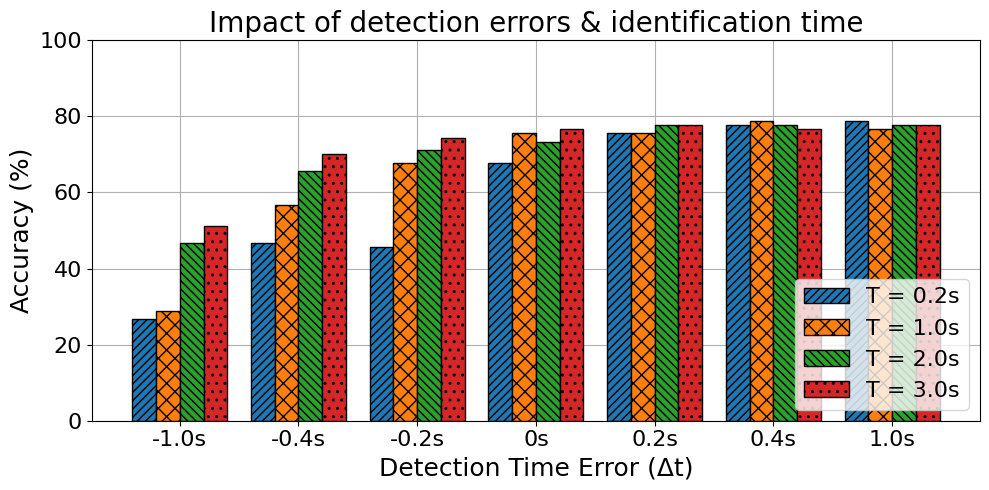

In [89]:
def plot_fsd_detection_time_impact(lens=[0.2, 0.4, 1.0, 2.0]):
    x_labels = [-1.0, -0.4, -0.2, 0, 0.2, 0.4, 1.0]
    
    res = {}
    for dt in x_labels:
        res[dt] = []
        offset = int(dt/0.2)
        for l in lens:
            succ = predict_dist(width=widths, datasets=pcap_file[10:100], window_size=200, dev=3, ws=25, start=30+offset, predict_time=l, k=5000)
            res[dt].append(round((succ/90)*100,2))
            # succ = predict_dist(width=widths, datasets=pcap_file[:10], window_size=200, dev=3, ws=25, start=0+offset, predict_time=l, k=5000)
            # res[dt].append(round((succ/10)*100,2))
                                
    print(res)
    
    # Organize the data
    all_data = [res[dt] for dt in x_labels]
    
    # Settings
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    hatches = ['////', 'XX', '\\\\\\\\', '..']
    bar_width = 0.2
    x = np.arange(len(x_labels))

    # Plot
    fig, ax = plt.subplots(figsize=(10,5))

    for i, time in enumerate(lens):
        bar_positions = x + i * bar_width - bar_width * 1.5  # Adjust positions
        bar_values = [all_data[j][i] for j in range(len(x_labels))]
        ax.bar(bar_positions, bar_values, bar_width, label=f'T = {time}s', color=colors[i], hatch=hatches[i], edgecolor='black', zorder=2)
        # ax.bar(bar_positions, bar_values, bar_width, color=colors, edgecolor='black', hatch=hatches[i])


    # Adding labels and title
    ax.set_xlabel('Detection Time Error (\u0394t)', fontsize=18)
    ax.set_ylabel('Accuracy (%)', fontsize=18)
    ax.set_title(f'Impact of detection errors & identification time', fontsize=20)
    ax.set_ylim(0, 100)  # Set y-axis limits to show percentages up to 100%
    ax.set_xticks(x)
    ax.set_xticklabels(f'{xlabel}s' for xlabel in x_labels)
    ax.xaxis.set_tick_params(labelsize=16)
    ax.yaxis.set_tick_params(labelsize=16)
    ax.legend(fontsize=16, loc='lower right')

    # # Create custom legend handles with no fill color
    # from matplotlib.patches import Patch
    # legend_handles = [Patch(facecolor='none', edgecolor='black', hatch=hatches[i], label=f't = {x_labels[i]}s') for i in range(len(x_labels))]
    # # legend_handles = [Patch(facecolor='none', color=colors[i], edgecolor='black', label=f't = {x_labels[i]}s') for i in range(len(x_labels))]

    # # Apply custom legend to the plot
    # ax.legend(handles=legend_handles, fontsize=16)
    
    plt.grid(zorder=0)
    plt.tight_layout()
    plt.show()
    
plot_fsd_detection_time_impact(lens=[0.2, 1.0, 2.0, 3.0])